<div style="text-align: left; background-color:#E9F7EF; font-family:Arial; color:#526085; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: dark green;">ĐỒ ÁN THỰC HÀNH</div>
<div style="text-align: left; background-color:#fadefc; font-family: Arial; color:#551184; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 18px">| Bộ môn: Python Cho Khoa Học Dữ Liệu |</div>

# <div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">PHẦN 2. MÔ HÌNH HÓA DỮ LIỆU</div>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #ACA224; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>Mục lục 📝</b></h3>
    
   * [I. Bài toán đặt ra:](#1)
        
   * [II. Tiền xử lý dữ liệu](#2)
        - [1. Loại những thuộc tính không có ý nghĩa cho việc mô hình hóa](#2.1)
        - [2. Chuyển đổi các cột không phải dạng số về dạng số](#2.2)
        - [3. Tính correlations và tiếp tục chọn những thuộc tính thật sự có giá trị](#2.3)
        - [4. Xử lý các giá trị NaN](#2.4)

   * [III. Xây dựng mô hình học máy](#3)
        - [1. Hồi quy tuyến tính đơn biến (Univariable Linear Regression)](#3.1)
        - [2. Hồi quy tuyến tính đa biến (Linear Regression with Multi Variables)](#3.2)
        - [3. Đánh giá mô hình (Evaluation)](#3.3)
        - [4. Hồi quy đa thức (Polynomial Regression) đơn giản với đơn biến](#3.4)
        - [5. Tổng kết](#3.5)

<a id="1"></a>
## <div style="text-align: left; background-color:#ACA224; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:10px">I. Bài toán đặt ra</div>

 **<span style='color:#2B9C15'>💬 Tên bài toán </span>** 
Dự đoán mức độ nghiêm trọng của vụ tai nạn với tập dữ liệu Canada Accident

 
 **<span style='color:#2B9C15'>💬 Giới thiệu chung </span>**

- Trong học máy, **học có giám sát** là một nhóm các thuật toán phổ biến trong lĩnh vực này và một trong những vấn đề quan trọng của học có giám sát là hồi quy(regression). Hồi quy là các bài toán liên quan đến việc dự đoán đầu ra có giá trị liên tục (predicting continous valued output).
- Và trong bài toán mà nhóm đề ra thì từ những cột thuộc tính đầu vào như diện tích căn hộ, số phòng ngủ, số phòng vệ sinh,.... Nhóm tiến hành dự đoán cột mục tiêu là giá bán của chung cư bằng thuật toán hồi quy tuyến tính (linear regression).

<a id="2"></a>
## <div style="text-align: left; background-color:#ACA224; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:10px">II. Tiền xử lý dữ liệu</div>

👉 Trước tên ta cần import và cài đặt một số thư viện cần thiết.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil import parser
sns.set_theme(palette='deep')
%matplotlib inline

👉 Tiếp đến đọc file `afterPreprocess` (file đã được tiền xử lý ở phần Khám phá dữ liệu) vào dataframe `accident_df` và in ra 3 dòng đầu tiên của dataframe.

In [2]:
df = pd.read_csv("./afterPreprocess.csv")
df.head()

,Unnamed: 0,Accident Date,Time (24hr),Road Surface,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,0,2014-01-01,14:15:00,Dry,Fine without high winds,Car,Passenger,Slight,Male,28
1,1,2014-01-01,00:05:00,Dry,Fine without high winds,Car,Passenger,Slight,Male,29
2,2,2014-01-01,02:20:00,Dry,Fine without high winds,Car,Driver,Slight,Female,21
3,3,2014-01-01,01:30:00,Wet/Damp,Fine without high winds,Car,Pedestrian,Serious,Female,34
4,4,2014-01-01,14:15:00,Dry,Fine without high winds,Car,Driver,Slight,Male,34


### <span style='color:#2B9C15'>Những yếu tố ảnh hưởng đến mức độ nghiêm trọng của vụ tai nạn - Trực quan hoá</span>

Text(0.5, 1.0, 'Thống kê Loại xe ảnh hưởng đến mức độ nghiêm trọng của vụ tai nạn')

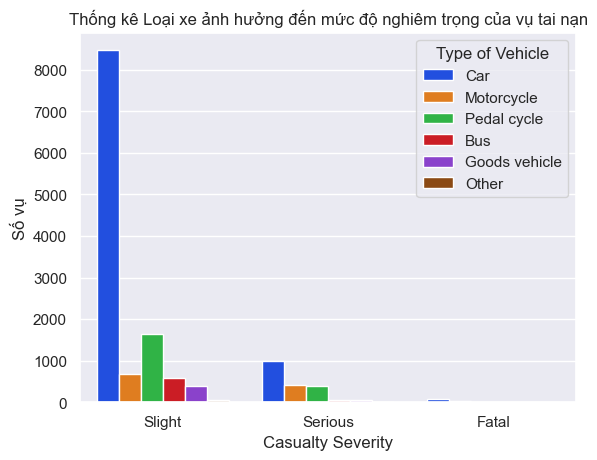

In [3]:
sns.countplot(data = df, x = df['Casualty Severity'], hue = 'Type of Vehicle', palette='bright')
plt.ylabel("Số vụ")
plt.title("Thống kê Loại xe ảnh hưởng đến mức độ nghiêm trọng của vụ tai nạn")

In [4]:
for severity in set(df['Casualty Severity']):
      print("==============================" ,severity, '==============================')
      print(df[df['Casualty Severity'] == severity]['Weather Conditions'].value_counts())

============================== Fatal ==============================
Fine without high winds       91
Raining without high winds    10
Raining with high winds        4
Fine with high winds           3
Fog or mist (if hazard)        2
Other                          1
Name: Weather Conditions, dtype: int64
============================== Serious ==============================
Fine without high winds       1638
Raining without high winds     188
Raining with high winds         24
Unknown                         22
Fine with high winds            15
Other                           14
Snowing without high winds       5
Snowing with high winds          1
Fog or mist (if hazard)          1
Name: Weather Conditions, dtype: int64
============================== Slight ==============================
Fine without high winds       10043
Raining without high winds     1072
Unknown                         268
Raining with high winds         166
Fine with high winds            134
Other                 

Text(0.5, 1.0, 'Thống kê điều kiện thời tiết ảnh hưởng đến mức độ nghiêm trọng của vụ tai nạn')

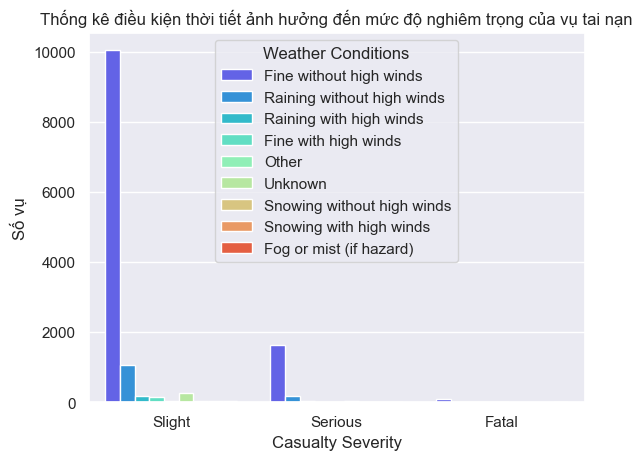

In [5]:
sns.countplot(data = df, x = df['Casualty Severity'], hue = 'Weather Conditions', palette='rainbow')
plt.ylabel("Số vụ")
plt.title("Thống kê điều kiện thời tiết ảnh hưởng đến mức độ nghiêm trọng của vụ tai nạn")

Text(0.5, 1.0, 'Thống kê tình trạng mặt đường ảnh hưởng đến mức độ nghiêm trọng của vụ tai nạn')

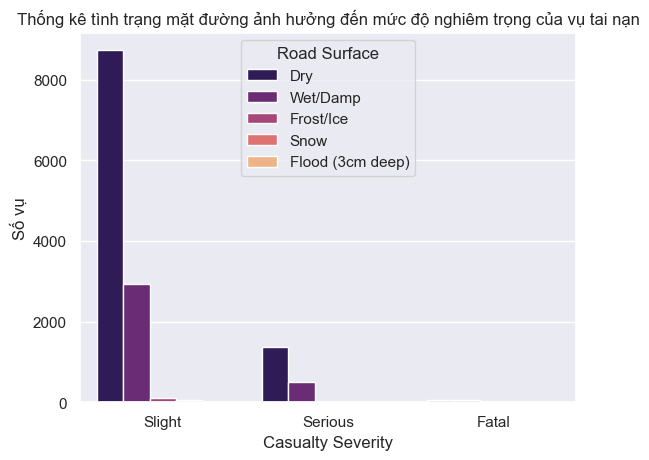

In [6]:
sns.countplot(data = df, x = df['Casualty Severity'], hue = 'Road Surface', palette='magma')
plt.ylabel("Số vụ")
plt.title("Thống kê tình trạng mặt đường ảnh hưởng đến mức độ nghiêm trọng của vụ tai nạn")

Text(0.5, 1.0, 'Thống kê mức độ nghiêm trọng của các đối tượng trong vụ tai nạn')

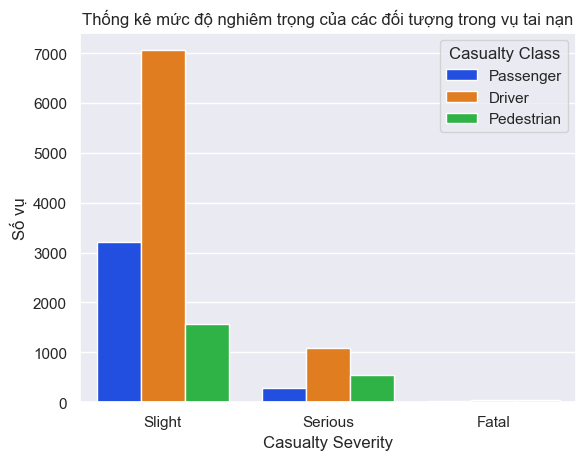

In [7]:
sns.countplot(data = df, x = df['Casualty Severity'], hue = 'Casualty Class', palette='bright')
plt.ylabel("Số vụ")
plt.title("Thống kê mức độ nghiêm trọng của các đối tượng trong vụ tai nạn")

### <span style='color:#2B9C15'>Làm sao để giải quyết vấn đề này bằng Machine Learning</span>

### <span style='color:#2B9C15'>Đưa dữ liệu Accident Date và Time về kiểu dữ liệu phù hợp để dễ phân tích</span>


In [8]:
# for i in range(len(df.index)):
#       df["Accident Date"] = pd.to_datetime(df["Accident Date"], format='%Y-%m-%d')

👉 Không nên dùng hàm to_datetime của thư viện pandas hoặc gán lại kiểu dữ liệu cho từng dữ liệu vì sẽ gây mất thời gian thực hiện. Nên đưa vào trong một list mới bằng strptime của datetime hoặc parser.parse của thư viện dateutil 

In [9]:
dt = []
time = []
for i in range(len(df.index)):
      dt.append(datetime.strptime(df["Accident Date"][i], '%Y-%m-%d').date())
      time.append(datetime.strptime(df["Time (24hr)"][i], '%H:%M:%S').time())


### <span style='color:#2B9C15'>Câu hỏi: Mối quan hệ giữa giờ, ngày, tuần, tháng với số lượng tai nạn gây thiệt mạng (Fatal Accidents) </span>

### <span style='color:#2B9C15'>Chuyển đổi các cột không phải dạng số về dạng số </span>

Chuyển các cột `Accident Date`, `Time (24hr)`, ... về dạng số để làm đầu vào cho machine learning model, tuy nhiên các cột có dạng số ngày vẫn mang ý nghĩa phân loại

In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[['Road Surface', 'Weather Conditions', 'Type of Vehicle', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty']] = enc.fit_transform(df[['Road Surface', 'Weather Conditions', 'Type of Vehicle', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty']])
df[:4]

,Unnamed: 0,Accident Date,Time (24hr),Road Surface,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,0,2014-01-01,14:15:00,0.0,1.0,1.0,1.0,2.0,1.0,28
1,1,2014-01-01,00:05:00,0.0,1.0,1.0,1.0,2.0,1.0,29
2,2,2014-01-01,02:20:00,0.0,1.0,1.0,0.0,2.0,0.0,21
3,3,2014-01-01,01:30:00,4.0,1.0,1.0,2.0,1.0,0.0,34


### <span style='color:#2B9C15'>Tính Correlations và tiếp tục chọn những thuộc tính thật sự có giá trị</span>

In [11]:
# Quan sát số lượng null ở các thuộc tính attribute
df.isnull().sum()

Unnamed: 0            0
Accident Date         0
Time (24hr)           0
Road Surface          0
Weather Conditions    0
Type of Vehicle       0
Casualty Class        0
Casualty Severity     0
Sex of Casualty       0
Age of Casualty       0
dtype: int64

**Như đã đề cập ở phần 1: Sau khi hoàn thành chuyển đổi hết các thuộc tính về dạng số, tiến hành tính correlations giữa từng thuộc tính và biến đầu ra:**
- Correlation là một thuật ngữ thống kê được sử dụng phổ biến đề cập đến mức độ liên quan của hai biến để có mối quan hệ tuyến tính với nhau hay không.
- Correlation cao nhất có giá trị là 1 (hai biến hoàn toàn có quan hệ tuyến tính) và thấp nhất dần nếu hai biến càng không có quan hệ tuyến tính.
- Nhóm sẽ tạo một dataframe tên là 'correlations' chứa các correlations của từng cột trong bộ dữ liệu để dễ dàng nhận xét mức độ tương quan giữa các biến.

In [12]:
correlations = pd.DataFrame(df, columns=['Road Surface', 'Weather Conditions', 'Type of Vehicle', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty']).corr()

In [13]:
print(correlations)

                    Road Surface  Weather Conditions  Type of Vehicle  \
Road Surface            1.000000            0.431936        -0.059775   
Weather Conditions      0.431936            1.000000        -0.025608   
Type of Vehicle        -0.059775           -0.025608         1.000000   
Casualty Class         -0.012286            0.005297        -0.298771   
Casualty Severity      -0.027223            0.013418        -0.117776   
Sex of Casualty         0.017328           -0.001069         0.262030   
Age of Casualty        -0.007414           -0.015945        -0.047104   

                    Casualty Class  Casualty Severity  Sex of Casualty  \
Road Surface             -0.012286          -0.027223         0.017328   
Weather Conditions        0.005297           0.013418        -0.001069   
Type of Vehicle          -0.298771          -0.117776         0.262030   
Casualty Class            1.000000          -0.096125        -0.156407   
Casualty Severity        -0.096125           

<AxesSubplot:>

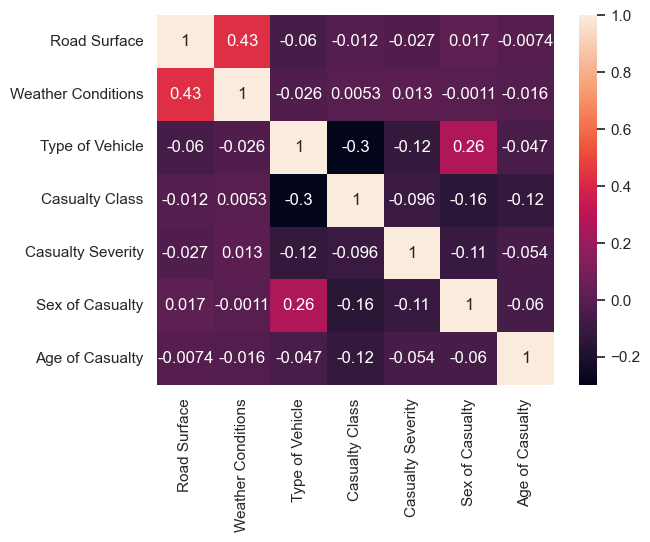

In [14]:
sns.heatmap(correlations, annot=True)

Phân tích